In [5]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/Fraud.csv')

In [6]:
import numpy
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
#check for null value
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [10]:
fraud_count = df['isFraud'].sum()
non_fraud_count = len(df[df['isFraud'] == 0])
flagged_fraud_count = len(df[df['isFlaggedFraud'] == 1])
flagged_non_fraud_count = len(df[df['isFlaggedFraud'] == 0])

print(f'Number of fraudulent transactions       : {fraud_count}')
print(f'Number of non-fraudulent transactions    : {non_fraud_count}')
print(f'\nNumber of transactions flagged as fraud  : {flagged_fraud_count}')
print(f'Number of transactions flagged as non-fraud: {flagged_non_fraud_count}')


Number of fraudulent transactions       : 8213
Number of non-fraudulent transactions    : 6354407

Number of transactions flagged as fraud  : 16
Number of transactions flagged as non-fraud: 6362604


In [11]:
df['type'].unique()
fraudby_type = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()
print(f'{fraudby_type}/t {flaggedFraudby_type}')

isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097/t type
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


In [14]:
print(len(df[(df['amount'] == df['oldbalanceOrg'])]))

len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)] )

8034


8034

In [12]:

outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]


transaction_counts = outliers['type'].value_counts()


cash_out_stats = outliers[outliers['type'] == 'CASH_OUT'].describe()


print(transaction_counts)
print(cash_out_stats)


type
TRANSFER    154
CASH_OUT     25
Name: count, dtype: int64
             step         amount  oldbalanceOrg  newbalanceOrig  \
count   25.000000      25.000000      25.000000         25.0000   
mean    56.880000  220121.416800   17031.663200      11950.7044   
std     78.015127  158136.453984   69138.559766      59753.5220   
min      1.000000   23292.300000       0.000000          0.0000   
25%     13.000000   95428.320000       0.000000          0.0000   
50%     19.000000  181728.110000       0.000000          0.0000   
75%     38.000000  314251.580000       0.000000          0.0000   
max    231.000000  577418.980000  340830.430000     298767.6100   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
count    2.500000e+01    2.500000e+01     25.0            25.0  
mean     5.806669e+05    1.185674e+06      1.0             0.0  
std      1.613350e+06    2.341533e+06      0.0             0.0  
min      0.000000e+00    4.061122e+04      1.0             0.0  
25%     

In [13]:
outliers[outliers['type'] == 'TRANSFER'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.0,154.000000
mean,439.097403,9.565122e+06,1.928838e+07,1.006063e+07,2.855618e+04,5.909128e+04,1.0,0.038961
std,213.665941,1.919552e+06,1.081729e+07,1.032873e+07,2.048429e+05,3.562933e+05,0.0,0.194133
min,4.000000,1.231949e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,271.500000,1.000000e+07,1.227122e+07,2.455224e+06,0.000000e+00,0.000000e+00,1.0,0.000000
50%,425.000000,1.000000e+07,1.595579e+07,6.359678e+06,0.000000e+00,0.000000e+00,1.0,0.000000
75%,646.000000,1.000000e+07,2.370846e+07,1.493847e+07,0.000000e+00,0.000000e+00,1.0,0.000000
max,741.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,1.000000


In [14]:
df[df['isFlaggedFraud'] == 1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


In [15]:
len(df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['type']=='TRANSFER') ])

21

In [16]:
len(df[df['isFlaggedFraud'] == 1])

16

In [17]:

outliers_filtered = df[
    (df['oldbalanceOrg'] == df['newbalanceOrig']) &
    (df['oldbalanceDest'] == df['newbalanceDest']) &

    (df['type'] == 'TRANSFER') &
    (df['isFlaggedFraud'] == 0)
]

outliers_stats = outliers_filtered.describe()
print(outliers_stats)


           step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count   5.00000       5.000000            5.0             5.0             5.0   
mean   16.80000  237475.474000            0.0             0.0             0.0   
std    16.11521  161578.156092            0.0             0.0             0.0   
min     1.00000   18931.590000            0.0             0.0             0.0   
25%    12.00000  133711.480000            0.0             0.0             0.0   
50%    12.00000  271161.740000            0.0             0.0             0.0   
75%    15.00000  342317.150000            0.0             0.0             0.0   
max    44.00000  421255.410000            0.0             0.0             0.0   

       newbalanceDest  isFraud  isFlaggedFraud  
count             5.0      5.0             5.0  
mean              0.0      0.0             0.0  
std               0.0      0.0             0.0  
min               0.0      0.0             0.0  
25%               0.0    

In [18]:

filtered_df = df[df['nameDest'].str.startswith('M')]


stats = filtered_df.describe()

unique_types = filtered_df['type'].unique()

print(stats)
print(unique_types)


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  2.151495e+06  2.151495e+06   2.151495e+06    2.151495e+06   
mean   2.443782e+02  1.305760e+04   6.821683e+04    6.183789e+04   
std    1.426951e+02  1.255645e+04   1.989911e+05    1.969915e+05   
min    1.000000e+00  2.000000e-02   0.000000e+00    0.000000e+00   
25%    1.560000e+02  4.383820e+03   0.000000e+00    0.000000e+00   
50%    2.490000e+02  9.482190e+03   1.053000e+04    0.000000e+00   
75%    3.350000e+02  1.756122e+04   6.088300e+04    4.965413e+04   
max    7.180000e+02  2.386380e+05   4.368662e+07    4.367380e+07   

       oldbalanceDest  newbalanceDest    isFraud  isFlaggedFraud  
count       2151495.0       2151495.0  2151495.0       2151495.0  
mean              0.0             0.0        0.0             0.0  
std               0.0             0.0        0.0             0.0  
min               0.0             0.0        0.0             0.0  
25%               0.0             0.0        0.0    

In [19]:
#Fixing the missing data
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), 'oldbalanceDest'] = np.NaN
updated_rows = df['oldbalanceDest'].isnull().sum()
print(f'{updated_rows} rows updated with NaN')
df = df.interpolate()


2151495 rows updated with NaN


<ipython-input-19-32efc6c8bb99>:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


In [20]:
df.isnull().values.any()

True

In [21]:
df[df['oldbalanceDest'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,NaN,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,NaN,0.0,0,0


In [22]:
df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0
df.isnull().values.any()

False

In [23]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']

In [24]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])

0

We have fixed all the missing data values but the classification is not yet done


There frauds only in CASH_OUT and TRANSFER we can ignore rest of the types

In [25]:
#Using only useful columns to make prediction
df = df.drop(['nameOrig', 'nameDest'], axis=1)

We dropped name and id

In [26]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean() / (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.710067,PAYMENT,9.195190,12.044412,11.984842,2.302585,2.302585,0,0
1,-0.710067,PAYMENT,7.535980,9.964536,9.872756,2.302585,2.302585,0,0
2,-0.710067,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1,0
3,-0.710067,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1,0
4,-0.710067,PAYMENT,9.365474,10.634990,10.305475,10.112316,2.302585,0,0


In [27]:
df2 = df[(df['type'].isin(['CASH_OUT', 'TRANSFER']))].copy(deep=True)

Using Only Cashout and Transfer

In [28]:
df2['step'] = df2['step'] - df2['step'].mean() / (df2['step'].std())
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.386012e+02,1.192809e+01,6.367012e+00,3.169231e+00,1.188522e+01,1.355135e+01,2.964544e-03,5.775321e-06
std,1.416191e+02,1.231621e+00,4.114653e+00,2.662251e+00,4.150795e+00,1.651896e+00,5.436687e-02,2.403183e-03
min,-2.406858e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.515931e+02,1.132640e+01,2.302585e+00,2.302585e+00,1.176044e+01,1.269863e+01,0.000000e+00,0.000000e+00
50%,2.325931e+02,1.205100e+01,5.749266e+00,2.302585e+00,1.322802e+01,1.362685e+01,0.000000e+00,0.000000e+00
75%,3.285931e+02,1.263396e+01,1.034197e+01,2.302585e+00,1.436704e+01,1.456797e+01,0.000000e+00,0.000000e+00
max,7.395931e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


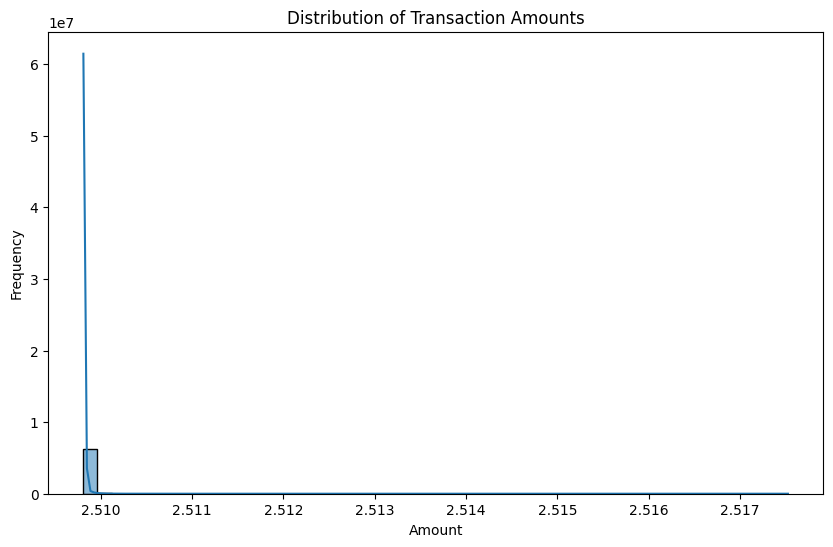

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


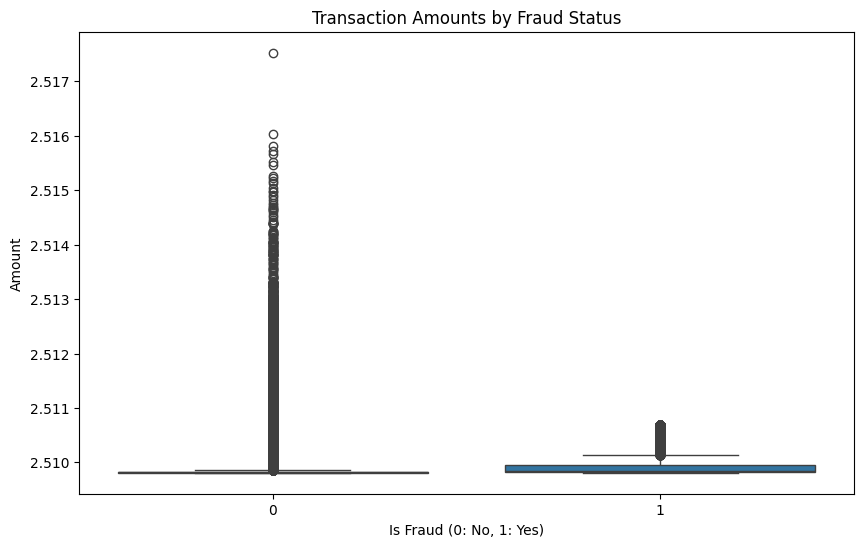

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Amount')
plt.show()


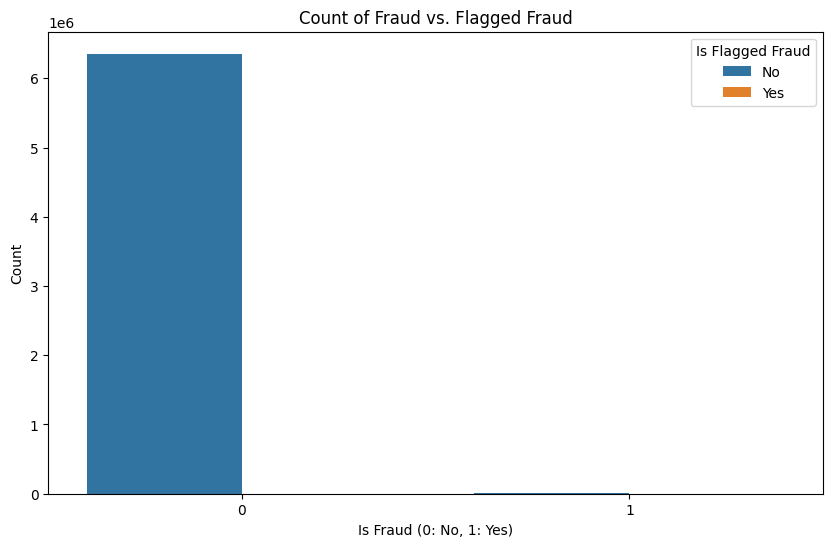

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', hue='isFlaggedFraud', data=df)
plt.title('Count of Fraud vs. Flagged Fraud')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Is Flagged Fraud', labels=['No', 'Yes'])
plt.show()


<ipython-input-42-ad3f29defa7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
<ipython-input-42-ad3f29defa7b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
<ipython-input-42-ad3f29defa7b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
<ipython-input-42-ad3f29defa7b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

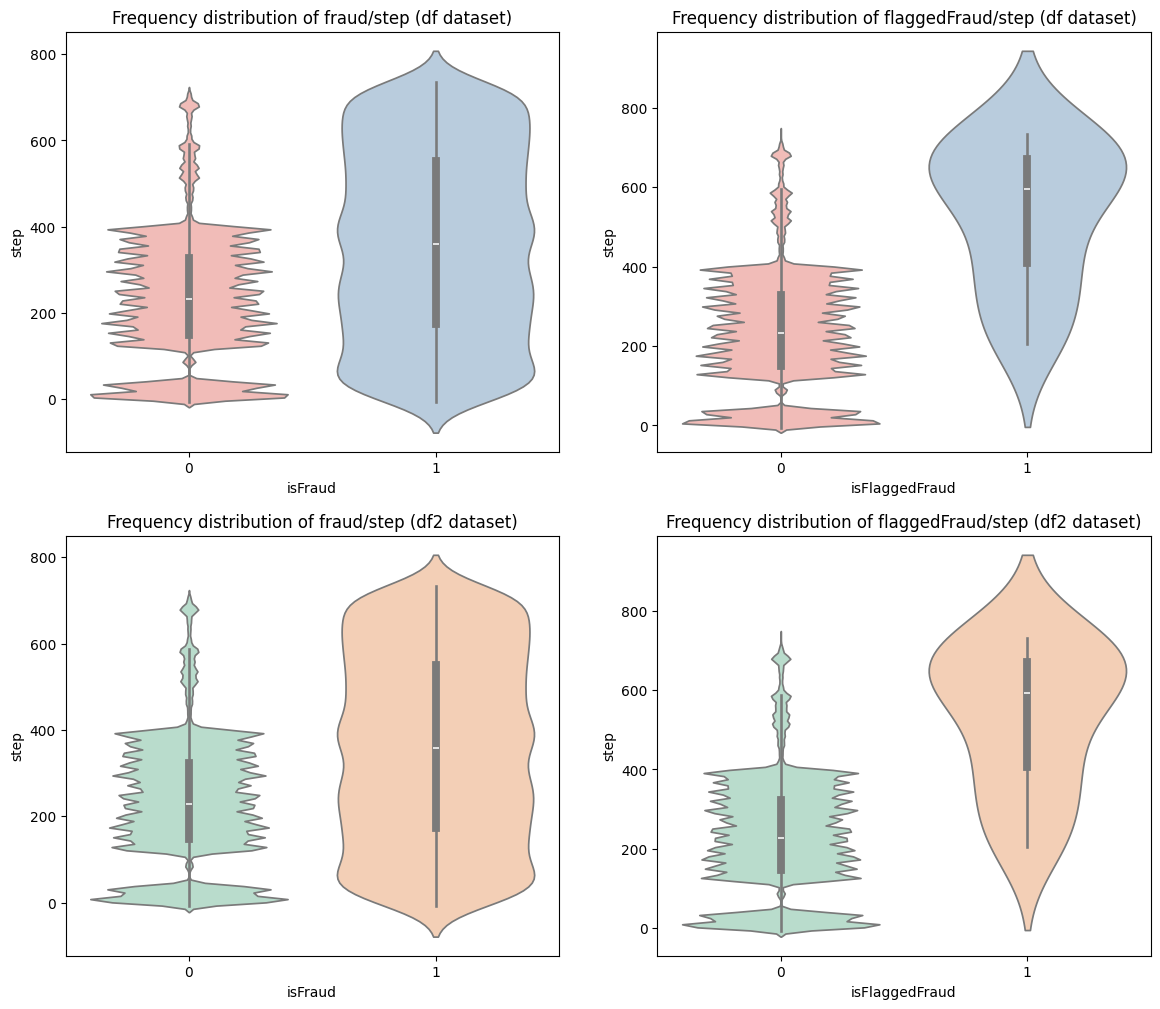

In [42]:
plt.rcParams['figure.figsize'] =(14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of flaggedFraud/step (df2 dataset)', fontsize = 12)

plt.show()

In [ ]:
#from these visualization we can see that our data is highly imbalanced
#We can SMOTE to reduce the imbalance.

In [43]:
import pandas as pd
from imblearn.over_sampling import SMOTE
X = df.copy()
X = pd.concat([X, pd.get_dummies(X['type'], prefix='type')], axis='columns')
X = X.drop(['isFraud', 'type'], axis=1)

X2 = df2.copy()
Y2 = X2['isFraud']
X2 = pd.concat([X2, pd.get_dummies(X2['type'], prefix='type')], axis='columns')
X2 = X2.drop(['isFraud', 'type'], axis=1)

X, Y = SMOTE(random_state=42).fit_resample(X, Y)
X2, Y2 = SMOTE(random_state=42).fit_resample(X2, Y2)

print("Class distribution in the first dataset after SMOTE:")
print(Y.value_counts())

print("Class distribution in the second dataset after SMOTE:")
print(Y2.value_counts())


Class distribution in the first dataset after SMOTE:
isFraud
0    6354407
1    6354407
Name: count, dtype: int64
Class distribution in the second dataset after SMOTE:
isFraud
1    2762196
0    2762196
Name: count, dtype: int64


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
random_state = 55
p = np.random.RandomState(seed=random_state).permutation(len(X))
p2 = np.random.RandomState(seed=random_state).permutation(len(X2))
X, Y = X.iloc[p], Y.iloc[p]
X2, Y2 = X2.iloc[p2], Y2.iloc[p2]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=random_state)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=random_state)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, test_size=0.5, random_state=random_state)
model = XGBClassifier(tree_method="hist", random_state=random_state)
model2 = XGBClassifier(tree_method="hist", random_state=random_state)


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model.fit(x_train, y_train)
model2.fit(x2_train, y2_train)

y_pred_test = model.predict(x_test)
y2_pred_test = model2.predict(x2_test)


print("Model 1 Evaluation on Dataset 1:")
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}\n")


print("Model 2 Evaluation on Dataset 2:")
accuracy2 = accuracy_score(y2_test, y2_pred_test)
precision2 = precision_score(y2_test, y2_pred_test)
recall2 = recall_score(y2_test, y2_pred_test)
f12 = f1_score(y2_test, y2_pred_test)
roc_auc2 = roc_auc_score(y2_test, model2.predict_proba(x2_test)[:, 1])
conf_matrix2 = confusion_matrix(y2_test, y2_pred_test)

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-score: {f12:.4f}")
print(f"ROC AUC: {roc_auc2:.4f}")
print(f"Confusion Matrix:\n{conf_matrix2}\n")


Model 1 Evaluation on Dataset 1:
Accuracy: 0.9986
Precision: 0.9982
Recall: 0.9991
F1-score: 0.9986
ROC AUC: 1.0000
Confusion Matrix:
[[1270412    2349]
 [   1118 1267884]]

Model 2 Evaluation on Dataset 2:
Accuracy: 0.9978
Precision: 0.9967
Recall: 0.9989
F1-score: 0.9978
ROC AUC: 0.9999
Confusion Matrix:
[[275720    919]
 [   316 275485]]



In [33]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
random_state = 55
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
dt_regressor = DecisionTreeRegressor(random_state=random_state)
dt_regressor.fit(x_train, y_train)
y_pred = dt_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor MSE: {mse}")
print(f"Decision Tree Regressor R2: {r2}")


Decision Tree Regressor MSE: 0.0003344135546862552
Decision Tree Regressor R2: 0.9986623428556253


In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
)
random_state = 55
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
dt_regressor = DecisionTreeRegressor(random_state=random_state)
dt_regressor.fit(x_train, y_train)
y_pred = dt_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regressor MSE: {mse:.4f}")
print(f"Decision Tree Regressor MAE: {mae:.4f}")
print(f"Decision Tree Regressor RMSE: {rmse:.4f}")
print(f"Decision Tree Regressor MAPE: {mape:.4f}")
print(f"Decision Tree Regressor Explained Variance: {explained_variance:.4f}")
print(f"Decision Tree Regressor R²: {r2:.4f}")


Decision Tree Regressor MSE: 0.0003
Decision Tree Regressor MAE: 0.0003
Decision Tree Regressor RMSE: 0.0183
Decision Tree Regressor MAPE: 1063104536663.0554
Decision Tree Regressor Explained Variance: 0.9987
Decision Tree Regressor R²: 0.9987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

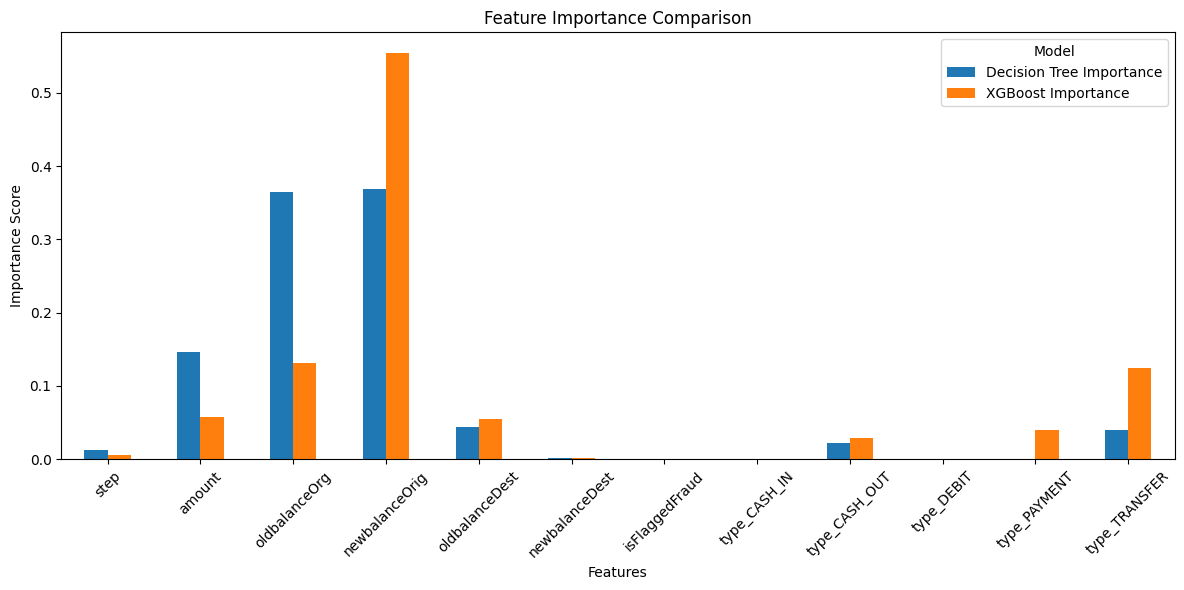

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

random_state = 55
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
dt_regressor = DecisionTreeRegressor(random_state=random_state)
xgb_regressor = XGBRegressor(tree_method="hist", random_state=random_state)
dt_regressor.fit(x_train, y_train)
xgb_regressor.fit(x_train, y_train)

dt_importance = dt_regressor.feature_importances_
xgb_importance = xgb_regressor.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree Importance': dt_importance,
    'XGBoost Importance': xgb_importance
})

importance_df.set_index('Feature', inplace=True)
plt.figure(figsize=(12, 6))
importance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance Comparison')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


1. Importance of diffOrg:
    - You are right that diffOrg has the biggest advantage and contributes the most to model predictions. This shows that the difference in origination balances (Before and after the transaction) plays an important role in determining the outcome. This is important in detecting fraud.
2. Payment against transfer of contributions:
    - Interestingly, PAYMENT has more to offer than transfers in terms of model predictions. This is because all payment samples in the original dataset are fraud-free. So it seems counterintuitive. A reasonable explanation might be
        
    - Imbalances in the number of payments versus transfer samples may be driving this result, as you suggest.
3. Interpretation Problems: Although the importance of payments is great, But that doesn't mean the feature directly predicts fraud. But it highlights the challenge of interpreting the importance of features in unbalanced datasets.
4. CASH_IN vs diffDest:
    - The result that CASH_IN has an advantage over diffDest is actually surprising, as diffDest intuitively appears to be more expensive.
    - The model may overfit the CASH_IN attribute because some pattern or noise is detected between trains.
5. Although somewhat heavier But Facebook has shown very little benefit.this   may indicate that fraudulent behavior is not well differentiated. Consistent with your assumption that fraudulent behavior may be evenly distributed across phase values, the model may find that this term contains less information to make better predictions. Even if it appears on multiple partitions.
6. isFlaggedFraud is ignored why this may be the reason
    - XGBoost may ignore isFlaggedFraud Because as you said A dataset may contain very few positive instances. This is because this feature does not contribute to model improvement. XGBoost's feature selection process (via regularization and optimization mechanisms) may not be relevant. This highlights an important point of tree models: Features that have the least variance or contribute little to error reduction are often neglected    

Fraud Prevention
1.The company should give importance to diffOrg and look for anamolies in it.
2.For flagging a transaction come up with new criteria to flag fraud transaction
3.Detect anamolies in feature that combines oldbalance and newbalance